<a href="https://colab.research.google.com/github/Manjuphoenix/ML_team_buzz/blob/michelle/sam_for_gen_mask_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Segment Anything Model (SAM) and other dependencies

In [2]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-t3freyjl
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-t3freyjl
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [3]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

### Download SAM weights

In [4]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
mkdir: cannot create directory ‘/content/weights’: File exists
/content/weights


In [5]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Load Model

In [6]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [7]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [8]:
# Visdrone class labels
# names:
#   0: pedestrian
#   1: people
#   2: bicycle
#   3: car
#   4: van
#   5: truck
#   6: tricycle
#   7: awning-tricycle
#   8: bus
#   9: motor

In [106]:
with open("/content/0000006_00159_d_0000001.txt") as f:
  content = f.readlines()
ped = 0
peo = 0
bic = 0
car = 0
van = 0
tru = 0
tri = 0
awn = 0
bus = 0
mot = 0

for i in range(len(content)):
  content[i] = content[i].replace("\n", "")
  if content[i][5]=="0":
    ped+=1
    # content[i][-1]="pedestrian"
  elif content[i][5]=="1":
    peo+=1
    # content[i][-1]="people"
  elif content[i][5]=="2":
    bic+=1
    # content[i][-1]="bicycle"
  elif content[i][5]=="3":
    car+=1
    # content[i][-1]="car"
  elif content[i][5]=="4":
    van+=1
    # content[i][-1]="van"
  elif content[i][5]=="5":
    tru+=1
    # content[i][-1]="truck"
  elif content[i][5]=="6":
    tri+=1
    # content[i][-1]="tricycle"
  elif content[i][5]=="7":
    awn+=1
    # content[i][-1]="awing tricycle"
  elif content[i][5]=="8":
    bus+=1
    # content[i][-1]="bus"
  elif content[i][5]=="9":
    mot+=1
    # content[i][-1]="motorcycle"

print(content)
print("Number of objects: ", len(content))
print("Number of Pedestrians: ", ped)
print("Number of People: ", peo)
print("Number of Bicycle: ", bic)
print("Number of Car: ", car)
print("Number of Van: ", van)
print("Number of Truck: ", tru)
print("Number of Tricycle: ", tri)
print("Number of Awning Tricycle: ", awn)
print("Number of Bus: ", bus)
print("Number of Motorcycle: ", mot)

new_list_ = []
new_list = []

['685,463,110,65,1,4,0,0', '578,328,36,38,1,4,0,0', '617,327,38,44,1,4,0,0', '659,350,90,40,1,4,0,0', '761,346,40,44,1,4,0,0', '805,350,38,41,1,4,0,0', '849,346,45,47,1,4,0,0', '895,349,43,44,1,4,0,0', '886,297,40,43,1,4,0,0', '810,305,70,40,1,4,0,0', '805,256,46,28,1,4,0,0', '783,234,70,27,1,4,0,0', '435,535,134,57,1,4,0,0', '488,507,118,52,1,4,0,1', '495,473,120,46,1,4,0,1', '507,447,107,38,1,4,0,1', '473,422,104,46,1,4,0,1', '913,179,33,31,1,4,0,0', '995,126,39,23,1,4,0,0', '922,106,20,21,1,4,0,0', '862,154,10,17,1,4,0,0', '1217,146,40,21,1,4,0,0', '1134,159,9,22,1,1,0,0', '1060,138,15,19,1,1,0,0', '1038,159,11,17,1,1,0,0', '387,215,144,51,0,11,0,0', '331,149,94,65,1,6,0,0', '296,152,104,65,1,6,0,2', '179,136,107,64,1,6,0,0', '139,138,118,62,1,6,0,2', '79,135,98,52,1,6,0,0', '32,140,92,40,1,6,0,0', '3,138,44,46,1,6,0,1', '0,231,91,89,1,6,1,0', '0,380,55,65,1,4,1,0', '29,393,89,59,1,4,0,1', '99,398,64,38,1,4,0,1', '165,392,58,37,1,4,0,1', '220,400,51,39,1,4,0,1', '315,409,42,19,1,10,

In [107]:
new_list_ = []
new_list = []
print(content)

['685,463,110,65,1,4,0,0', '578,328,36,38,1,4,0,0', '617,327,38,44,1,4,0,0', '659,350,90,40,1,4,0,0', '761,346,40,44,1,4,0,0', '805,350,38,41,1,4,0,0', '849,346,45,47,1,4,0,0', '895,349,43,44,1,4,0,0', '886,297,40,43,1,4,0,0', '810,305,70,40,1,4,0,0', '805,256,46,28,1,4,0,0', '783,234,70,27,1,4,0,0', '435,535,134,57,1,4,0,0', '488,507,118,52,1,4,0,1', '495,473,120,46,1,4,0,1', '507,447,107,38,1,4,0,1', '473,422,104,46,1,4,0,1', '913,179,33,31,1,4,0,0', '995,126,39,23,1,4,0,0', '922,106,20,21,1,4,0,0', '862,154,10,17,1,4,0,0', '1217,146,40,21,1,4,0,0', '1134,159,9,22,1,1,0,0', '1060,138,15,19,1,1,0,0', '1038,159,11,17,1,1,0,0', '387,215,144,51,0,11,0,0', '331,149,94,65,1,6,0,0', '296,152,104,65,1,6,0,2', '179,136,107,64,1,6,0,0', '139,138,118,62,1,6,0,2', '79,135,98,52,1,6,0,0', '32,140,92,40,1,6,0,0', '3,138,44,46,1,6,0,1', '0,231,91,89,1,6,1,0', '0,380,55,65,1,4,1,0', '29,393,89,59,1,4,0,1', '99,398,64,38,1,4,0,1', '165,392,58,37,1,4,0,1', '220,400,51,39,1,4,0,1', '315,409,42,19,1,10,

In [108]:
for i in range(len(content)):
  new_list_.append(content[i].split(','))
    # new_list += content[i]
print(new_list_)
print(len(new_list_))

[['685', '463', '110', '65', '1', '4', '0', '0'], ['578', '328', '36', '38', '1', '4', '0', '0'], ['617', '327', '38', '44', '1', '4', '0', '0'], ['659', '350', '90', '40', '1', '4', '0', '0'], ['761', '346', '40', '44', '1', '4', '0', '0'], ['805', '350', '38', '41', '1', '4', '0', '0'], ['849', '346', '45', '47', '1', '4', '0', '0'], ['895', '349', '43', '44', '1', '4', '0', '0'], ['886', '297', '40', '43', '1', '4', '0', '0'], ['810', '305', '70', '40', '1', '4', '0', '0'], ['805', '256', '46', '28', '1', '4', '0', '0'], ['783', '234', '70', '27', '1', '4', '0', '0'], ['435', '535', '134', '57', '1', '4', '0', '0'], ['488', '507', '118', '52', '1', '4', '0', '1'], ['495', '473', '120', '46', '1', '4', '0', '1'], ['507', '447', '107', '38', '1', '4', '0', '1'], ['473', '422', '104', '46', '1', '4', '0', '1'], ['913', '179', '33', '31', '1', '4', '0', '0'], ['995', '126', '39', '23', '1', '4', '0', '0'], ['922', '106', '20', '21', '1', '4', '0', '0'], ['862', '154', '10', '17', '1', '

In [109]:
print(new_list)
print(len(new_list))

[]
0


In [110]:
ped = 0
peo = 0
bic = 0
car = 0
van = 0
tru = 0
tri = 0
awn = 0
bus = 0
mot = 0
oth = 0

for i in range(0,len(new_list_)):
  if int(new_list_[i][5])==1:
    # new_list_[i].append("pedestrain")
    new_list.append(new_list_[i][:4]+["pedestrain"])
    ped+=1
  elif int(new_list_[i][5])==2:
    new_list.append(new_list_[i][:4]+["people"])
    peo+=1
  elif int(new_list_[i][5])==3:
    new_list.append(new_list_[i][:4]+["bicycle"])
    bic+=1
  elif int(new_list_[i][5])==4:
    new_list.append(new_list_[i][:4]+["car"])
    car+=1
  elif int(new_list_[i][5])==5:
    new_list.append(new_list_[i][:4]+["van"])
    van+=1
  elif int(new_list_[i][5])==6:
    new_list.append(new_list_[i][:4]+["truck"])
    tru+=1
  elif int(new_list_[i][5])==7:
    new_list.append(new_list_[i][:4]+["tricycle"])
    tri+=1
  elif int(new_list_[i][5])==8:
    new_list.append(new_list_[i][:4]+["awing-tricycle"])
    awn+=1
  elif int(new_list_[i][5])==9:
    new_list.append(new_list_[i][:4]+["bus"])
    bus+=1
  elif int(new_list_[i][5])==10:
    new_list.append(new_list_[i][:4]+["motor"])
    mot+=1
  elif int(new_list_[i][5])==11:
    # new_list_[i].append("pedestrain")
    new_list.append(new_list_[i][:4]+["others"])
    oth+=1
  else:
    print("ERROR at ", i, new_list_[i])

print(new_list)

print("Number of objects: ", len(content))
print("Number of Pedestrians: ", ped)
print("Number of People: ", peo)
print("Number of Bicycle: ", bic)
print("Number of Car: ", car)
print("Number of Van: ", van)
print("Number of Truck: ", tru)
print("Number of Tricycle: ", tri)
print("Number of Awning Tricycle: ", awn)
print("Number of Bus: ", bus)
print("Number of Motorcycle: ", mot)

ERROR at  59 ['680', '0', '80', '49', '0', '0', '0', '0']
ERROR at  71 ['820', '0', '55', '31', '0', '0', '0', '0']
[['685', '463', '110', '65', 'car'], ['578', '328', '36', '38', 'car'], ['617', '327', '38', '44', 'car'], ['659', '350', '90', '40', 'car'], ['761', '346', '40', '44', 'car'], ['805', '350', '38', '41', 'car'], ['849', '346', '45', '47', 'car'], ['895', '349', '43', '44', 'car'], ['886', '297', '40', '43', 'car'], ['810', '305', '70', '40', 'car'], ['805', '256', '46', '28', 'car'], ['783', '234', '70', '27', 'car'], ['435', '535', '134', '57', 'car'], ['488', '507', '118', '52', 'car'], ['495', '473', '120', '46', 'car'], ['507', '447', '107', '38', 'car'], ['473', '422', '104', '46', 'car'], ['913', '179', '33', '31', 'car'], ['995', '126', '39', '23', 'car'], ['922', '106', '20', '21', 'car'], ['862', '154', '10', '17', 'car'], ['1217', '146', '40', '21', 'car'], ['1134', '159', '9', '22', 'pedestrain'], ['1060', '138', '15', '19', 'pedestrain'], ['1038', '159', '11',

In [16]:

import numpy as np
car_bbox = []

for i in range(0,len(new_list_)):
  if int(new_list_[i][5])==4:
    np.array(car_bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]])))

# print(car_bbox)

print(car_det[0].xyxy[0][0])

686


<ipython-input-111-019ade63e258>:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = i.astype(np.float)


[array([685, 463, 795, 528]), array([578, 328, 614, 366]), array([617, 327, 655, 371]), array([659, 350, 749, 390]), array([761, 346, 801, 390]), array([805, 350, 843, 391]), array([849, 346, 894, 393]), array([895, 349, 938, 393]), array([886, 297, 926, 340]), array([810, 305, 880, 345]), array([805, 256, 851, 284]), array([783, 234, 853, 261]), array([435, 535, 569, 592]), array([488, 507, 606, 559]), array([495, 473, 615, 519]), array([507, 447, 614, 485]), array([473, 422, 577, 468]), array([913, 179, 946, 210]), array([ 995,  126, 1034,  149]), array([922, 106, 942, 127]), array([862, 154, 872, 171]), array([1217,  146, 1257,  167]), array([  0, 380,  55, 445]), array([ 29, 393, 118, 452]), array([ 99, 398, 163, 436]), array([165, 392, 223, 429]), array([220, 400, 271, 439]), array([1036,  106, 1056,  120]), array([745, 130, 783, 148]), array([853,  67, 867,  79]), array([917,  99, 930, 113]), array([840,  50, 852,  60]), array([857,  44, 866,  56]), array([846,  36, 858,  47]), a

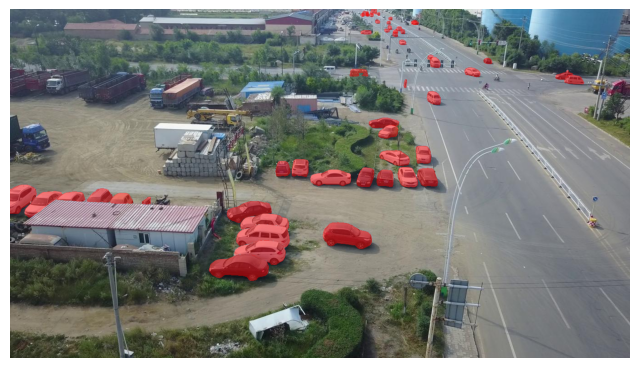

[[(718.0, 467.0), (717.0, 468.0), (706.0, 468.0), (705.0, 469.0), (703.0, 469.0), (702.0, 470.0), (701.0, 470.0), (689.0, 482.0), (689.0, 484.0), (688.0, 485.0), (688.0, 487.0), (687.0, 488.0), (687.0, 492.0), (686.0, 493.0), (686.0, 498.0), (687.0, 499.0), (687.0, 502.0), (688.0, 503.0), (688.0, 504.0), (689.0, 505.0), (689.0, 506.0), (695.0, 512.0), (695.0, 513.0), (696.0, 514.0), (696.0, 515.0), (697.0, 516.0), (697.0, 517.0), (698.0, 517.0), (699.0, 518.0), (702.0, 518.0), (703.0, 519.0), (705.0, 519.0), (706.0, 518.0), (709.0, 518.0), (714.0, 513.0), (717.0, 513.0), (718.0, 512.0), (719.0, 512.0), (720.0, 513.0), (724.0, 513.0), (725.0, 514.0), (735.0, 514.0), (736.0, 515.0), (742.0, 515.0), (743.0, 516.0), (748.0, 516.0), (749.0, 517.0), (756.0, 517.0), (763.0, 524.0), (764.0, 524.0), (765.0, 525.0), (774.0, 525.0), (775.0, 524.0), (776.0, 524.0), (777.0, 523.0), (778.0, 523.0), (779.0, 522.0), (780.0, 522.0), (781.0, 521.0), (782.0, 521.0), (783.0, 520.0), (784.0, 520.0), (785.0

In [111]:
# For Pedestrains class only
import numpy as np
import cv2
import numpy as np
import supervision as sv
import os
import json
from shapely.geometry import Polygon

car_bbox = []

for i in range(0,len(new_list_)):
  if int(new_list_[i][5])==4:
    np.array(car_bbox.append(np.array([new_list[i][0], new_list[i][1], new_list[i][2], new_list[i][3]])))

# Converting the annotation of Visdrone format to bounding box coordinates

car_np_bbox = []

for i in car_bbox:
  y = i.astype(np.float)
  box = np.array([
      int(y[0]),int(y[1]),int(y[0])+int(y[2]),int(y[1])+int(y[3])
  ])
  car_np_bbox.append(box)

print(car_np_bbox)
# abc = numpy.array(['685', '463', '795', '528'])
print(len(car_np_bbox))

# For generating the mask files for the given bounding box using SAM

IMAGE_PATH = "/content/0000006_00159_d_0000001.jpg"
mask_predictor = SamPredictor(sam)

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

car_masks = []
print(type(car_masks))

for i in car_np_bbox:
  masks, scores, logits = mask_predictor.predict(
    # box=numpy.array(i),
    box = i,
    multimask_output=True
  )
  car_masks.append(masks)

print(len(car_masks))

# To plot the masks on the image for verification
car_det = []
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

for j in car_masks:
  detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=j),
    mask=j
  )
  detections = detections[detections.area == np.max(detections.area)]
  car_det.append(detections)

  source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
  segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  # sv.plot_images_grid(
  #     images=[source_image, segmented_image],
  #     grid_size=(1, 2),
  #     titles=['source image', 'segmented image']
  # )

#   cv2.imwrite('/content/abc.jpg', segmented_image)
#   cv2.imwrite('/content/abc_.jpg', source_image)
# print(len(car_det))


# TO plot all the bounding box in single input image:
image = cv2.imread('/content/0000006_00159_d_0000001.jpg')

for j in car_det:
  if j[0].xyxy[0][0]==686:
    annotated_image = mask_annotator.annotate(image.copy(), detections=j)
  else:
    annotated_image = mask_annotator.annotate(annotated_image.copy(), detections=j)


sv.plot_image(image=annotated_image, size=(8, 8))

# TO get polygons of respective bounding boxes in a given single image:
car_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            car_lst.append(polygons)

    return car_lst


binary_masks = car_det[1].mask+0
image_ids = "abc"
category_id = 1  # Category ID for the objects in the masks


for det_id in range(len(car_det)):
  pg_pnt = create_coco_annotation(car_det[det_id].mask+0, image_ids, category_id)


new_car_lst = []
count = 0
for i in pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
  new_car_lst.append(tmp_lst)
print(new_car_lst)


(765, 1360, 1)
<class 'numpy.ndarray'>


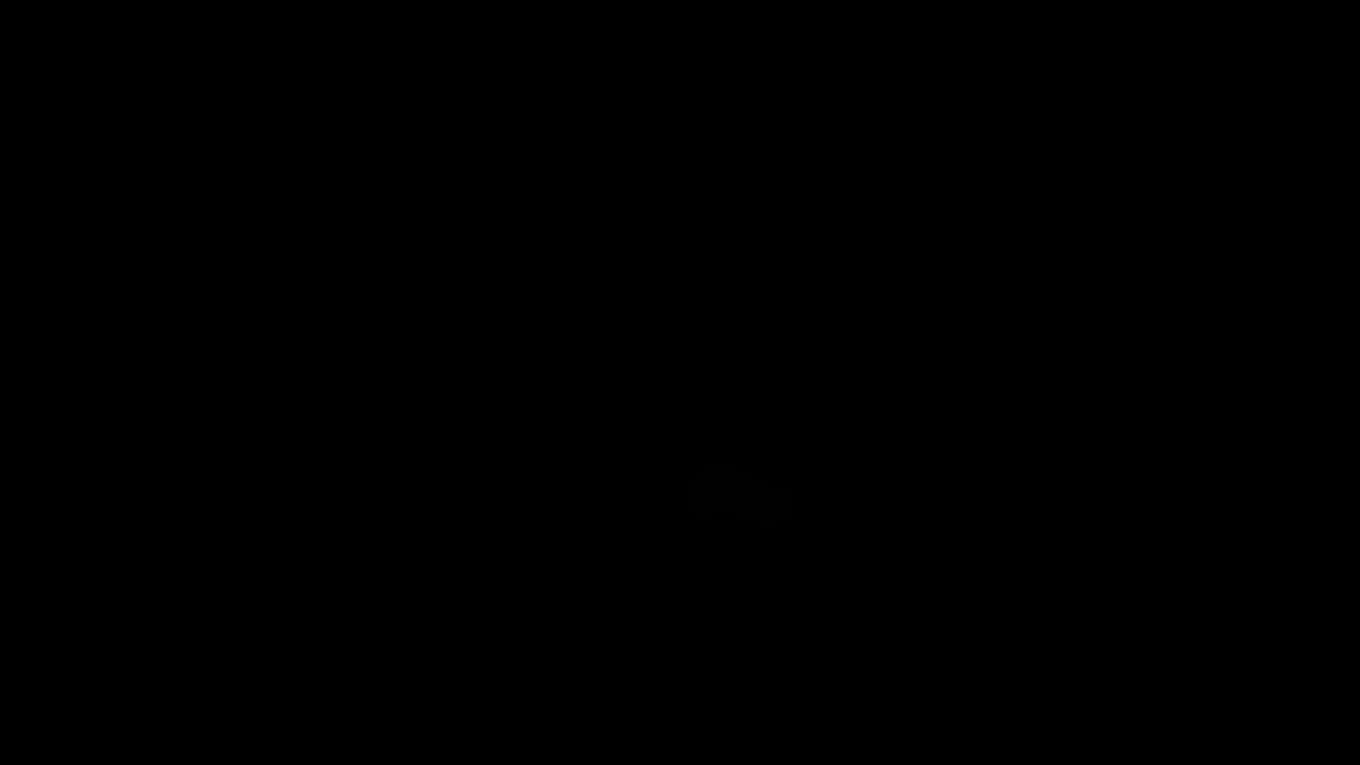

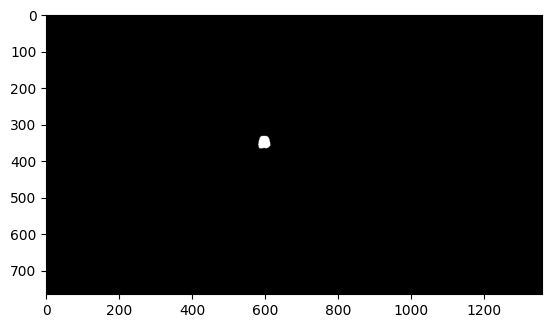

In [119]:
from numpy import expand_dims
from numpy import asarray
from PIL import Image
from numpy import moveaxis
import matplotlib.pyplot as plt



# load the image
img = car_det[1].mask+0
data = asarray(img)
# change channels last to channels first format
data = moveaxis(data, 1, 0)
data = moveaxis(data, 2, 1)
print(data.shape)
print(type(data))


plt.imshow(data, cmap="gray")

b_image = car_det[0].mask+0
b_image = b_image.astype('uint8')
b_image = np.squeeze(b_image)
image = Image.fromarray(b_image)
image.show()

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

sv.plot_images_grid(
    images=car_det[1].mask,
    grid_size=(1,2),
    size=(16, 4)
)

binary_mask = car_det[1].mask+0
converted_mask = np.squeeze(binary_mask, axis=0)
converted_mask = np.expand_dims(converted_mask, axis=2)

print(converted_mask.shape)

cv2_imshow(converted_mask)


cv2.imwrite("/content/mk2.jpg", converted_mask)
sv.plot_images_grid(
    images=converted_mask,
    grid_size=(4,2),
    size=(1,1)
)
# cv2.imwrite("/content/bk1.jpg", converted_mask)

In [127]:
import numpy as np
from PIL import Image

img = car_det[1].mask+0
img = img.astype(np.uint8)
array = np.reshape(img, (765, 1360))

im = Image.fromarray(array)
im.save("/content/filename.jpeg")

(765, 1360)


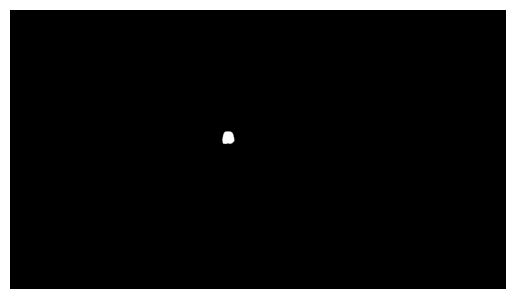

In [130]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
#input data

img = np.squeeze(img)
print(img.shape)
plt.axis('off')
plt.grid(False)
plt.imshow(img, cmap="gray")
plt.savefig("/content/mk.jpg")

(765, 1360, 1) ----
(765, 1360, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


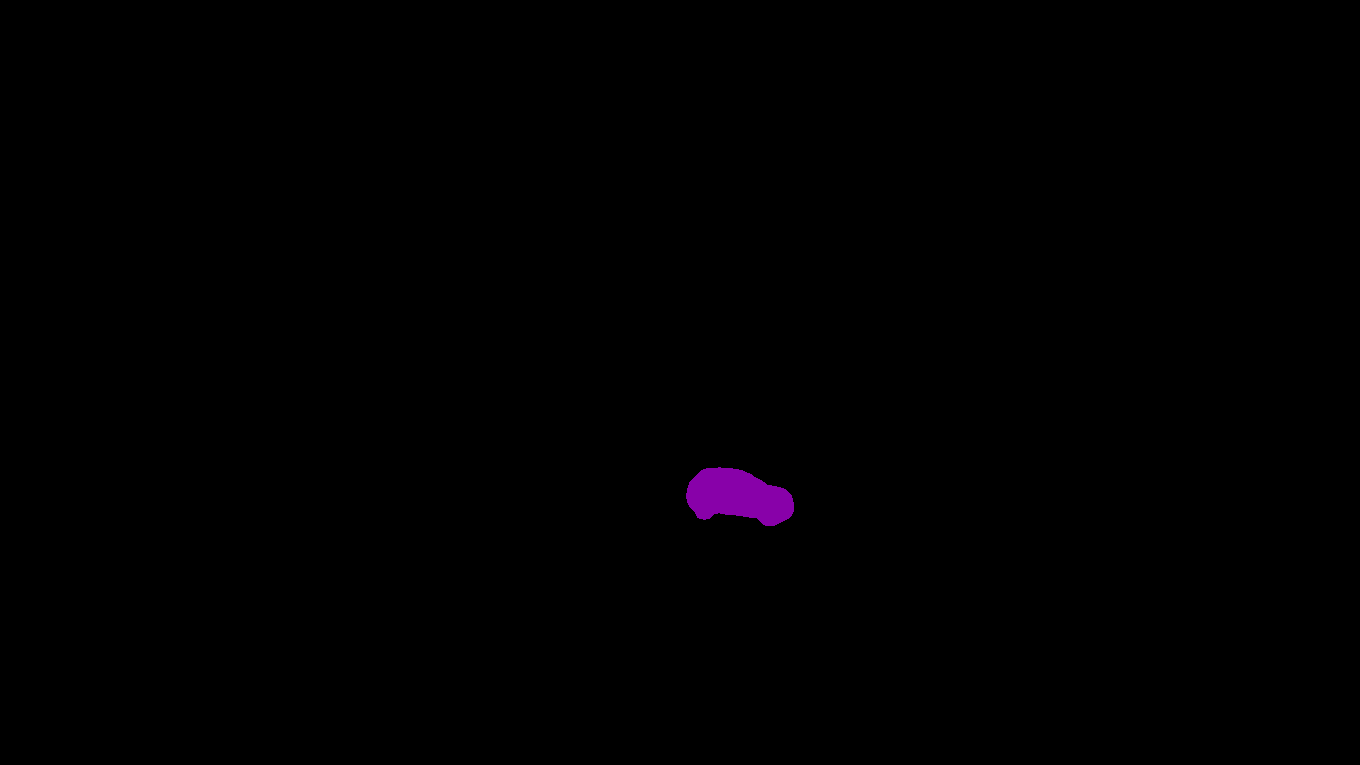

In [186]:
import numpy as np
from PIL import Image

# gradient between 0 and 1 for 256*256
array = car_det[0].mask+0

# reshape to 2d
mat = np.reshape(array,(765,1360))

# Creates PIL image
img = Image.fromarray(np.uint8(mat * 255) , 'L')
car1 = np.array(img)
car = np.array([car1])
mat = np.expand_dims(mat, axis=-1)
print(mat.shape, "----")
a = mat[:,:,:]
b = mat[:,:,:]
c = mat[:,:,:]

final = np.stack((a,b,c), axis=2)
# print(final)

cv2.imwrite("/content/filesfggijg.jpg", np.array(final))
final = np.squeeze(final)
print(final.shape)
im = Image.fromarray(np.uint8(final * 255), 'RGB')
im = np.asarray(im)
im[:,:,0] = im[:,:,0]*120
im[:,:,1] = im[:,:,1]*255
im[:,:,2] = im[:,:,2]*87
print(im[:,:,2])

cv2.imwrite("/content/finalfile.jpg", np.asarray(im))
im = Image.fromarray(im)
im.show()

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


binary_mask = car_det[1].mask+0
# Convert binary mask shape to (740, 1280, 1)
converted_mask = np.squeeze(binary_mask, axis=0)
converted_mask = np.expand_dims(converted_mask, axis=2)

print(converted_mask.shape)

cv2_imshow(converted_mask)
cv2.imwrite("bk1.jpg",)

In [50]:
import torchvision
from PIL import Image

bk_image = np.zeros(shape=(1,765,1360))
img = Image.open("/content/0000006_00159_d_0000001.jpg")

im_np = np.array(img)
mk1 = car_det[1].mask
mk1_3 = mk1[:,:,1]
mk1_3 = mk1[:,:,2]
mk1_3 = mk1[:,:,3]

print(mk1.shape)
print(im_np.shape)


trafos = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor(),
])


cv2.imwrite("/content/mk1.jpg", np.array(trafos(img)))

# sv.plot_images_grid(
#     images=mk1_3,
#     grid_size=(1,2),
#     size=(16, 4)
# )


# for n in range(len(car_det)):
#   bk_image += car_det[n].mask

# sv.plot_images_grid(
#     images=bk_image,
#     grid_size=(1,2),
#     size=(16, 4)
# )

(1, 765, 1360)
(765, 1360, 3)


False

In [66]:
import os
import numpy as np
import json
import cv2
from shapely.geometry import Polygon


final_lst = []

def create_coco_annotation(binary_masks, image_ids, category_id):
    annotations = []
    binary_masks = np.array(binary_masks, np.uint8)
    for i, mask_data in enumerate(binary_masks):
        # Find contours from binary mask
        contours, _ = cv2.findContours(mask_data.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Convert contours to polygon
        polygons = []
        for contour in contours:
            contour = contour.squeeze()
            polygon = Polygon(contour)
            polygons.append(np.array(polygon.exterior.coords).ravel().tolist())
            final_lst.append(polygons)
            # print(len(polygons))
            # print(polygons)

        # print(polygons, "Polygons")

        # annotation = {
        #     'id': i + 1,
        #     'image_id': image_ids[i],
        #     'category_id': category_id,
        #     'segmentation': polygons,
        #     'area': float(mask_data.sum()),
        #     'bbox': cv2.boundingRect(mask_data.astype(np.uint8)).tolist(),
        #     'iscrowd': 0
        # }
        # annotations.append(annotation)

    return final_lst


# Example usage
binary_masks = total_det[1].mask+0

image_ids = "abc"

category_id = 1  # Category ID for the objects in the masks


for det_id in range(len(total_det)):
  pg_pnt = create_coco_annotation(total_det[det_id].mask+0, image_ids, category_id)

# print(pg_pnt)

new_lst = []
count = 0
for i in pg_pnt:
  count += 1
  tmp_lst = []
  for j in i:
    for n in range(len(j)):
      if n%2==0:
        tmp_lst.append((j[n], j[n+1]))
        # print((count, j[n], j[n+1]))
  new_lst.append(tmp_lst)



print(new_lst)

# annotations = create_coco_annotation(binary_masks, image_ids, category_id)

# Create COCO JSON annotation
# coco_annotation = {
#     'annotations': annotations,
#     'categories': [
#         {
#             'id': category_id,
#             'name': 'object_category',
#             'supercategory': 'object'
#         }
#     ]
# }

# Save the COCO JSON annotation to a file
# with open('/content/annotations.txt', 'w') as f:
#     json.dump(pg_pnt, f)


[[(718.0, 467.0), (717.0, 468.0), (706.0, 468.0), (705.0, 469.0), (703.0, 469.0), (702.0, 470.0), (701.0, 470.0), (689.0, 482.0), (689.0, 484.0), (688.0, 485.0), (688.0, 487.0), (687.0, 488.0), (687.0, 492.0), (686.0, 493.0), (686.0, 498.0), (687.0, 499.0), (687.0, 502.0), (688.0, 503.0), (688.0, 504.0), (689.0, 505.0), (689.0, 506.0), (695.0, 512.0), (695.0, 513.0), (696.0, 514.0), (696.0, 515.0), (697.0, 516.0), (697.0, 517.0), (698.0, 517.0), (699.0, 518.0), (702.0, 518.0), (703.0, 519.0), (705.0, 519.0), (706.0, 518.0), (709.0, 518.0), (714.0, 513.0), (717.0, 513.0), (718.0, 512.0), (719.0, 512.0), (720.0, 513.0), (724.0, 513.0), (725.0, 514.0), (735.0, 514.0), (736.0, 515.0), (742.0, 515.0), (743.0, 516.0), (748.0, 516.0), (749.0, 517.0), (756.0, 517.0), (763.0, 524.0), (764.0, 524.0), (765.0, 525.0), (774.0, 525.0), (775.0, 524.0), (776.0, 524.0), (777.0, 523.0), (778.0, 523.0), (779.0, 522.0), (780.0, 522.0), (781.0, 521.0), (782.0, 521.0), (783.0, 520.0), (784.0, 520.0), (785.0

In [19]:
cv2.imwrite("/content/abc_all_instance.jpg", annotated_image)

True

In [67]:
bk_image = np.zeros(shape=(1,765,1360))

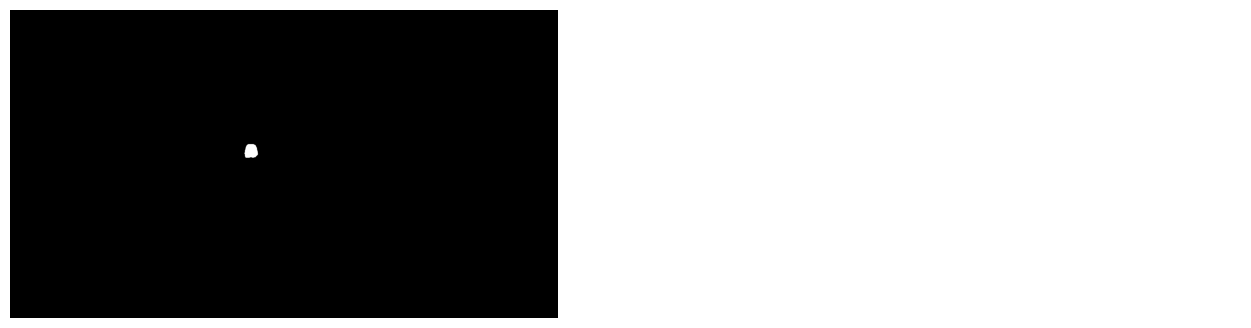

(1, 765, 1360)
(1, 765, 1360)


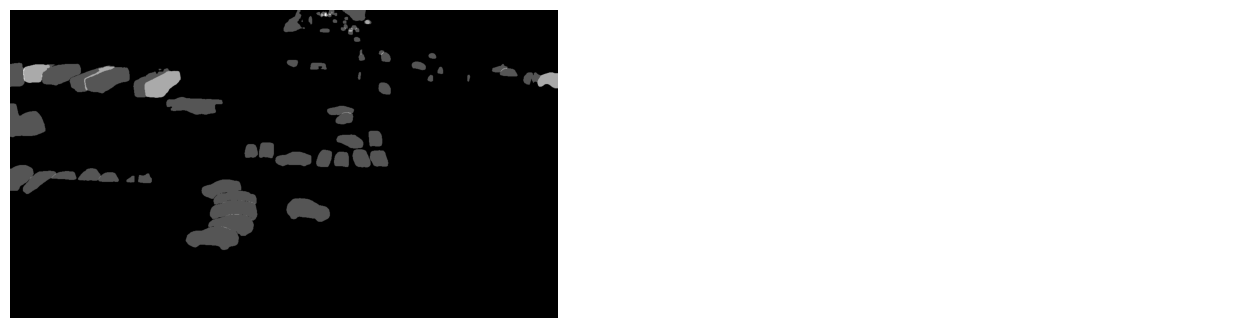

In [68]:
sv.plot_images_grid(
    images=total_det[1].mask,
    grid_size=(1,2),
    size=(16, 4)
)

print(total_det[0].mask.shape)

for n in range(len(total_det)):
  bk_image += total_det[n].mask

print(bk_image.shape)

sv.plot_images_grid(
    images=bk_image,
    grid_size=(1,2),
    size=(16, 4)
)

## Automated Mask Generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Union, Optional
from dataclasses_json import dataclass_json
from supervision import Detections


@dataclass_json
@dataclass
class COCOCategory:
    id: int
    name: str
    supercategory: str


@dataclass_json
@dataclass
class COCOImage:
    id: int
    width: int
    height: int
    file_name: str
    license: int
    date_captured: str
    coco_url: Optional[str] = None
    flickr_url: Optional[str] = None


@dataclass_json
@dataclass
class COCOAnnotation:
    id: int
    image_id: int
    category_id: int
    segmentation: List[List[float]]
    area: float
    bbox: Tuple[float, float, float, float]
    iscrowd: int


@dataclass_json
@dataclass
class COCOLicense:
    id: int
    name: str
    url: str


@dataclass_json
@dataclass
class COCOJson:
    images: List[COCOImage]
    annotations: List[COCOAnnotation]
    categories: List[COCOCategory]
    licenses: List[COCOLicense]


def load_coco_json(json_file: str) -> COCOJson:
    import json

    with open(json_file, "r") as f:
        json_data = json.load(f)

    return COCOJson.from_dict(json_data)


class COCOJsonUtility:
    @staticmethod
    def get_annotations_by_image_id(coco_data: COCOJson, image_id: int) -> List[COCOAnnotation]:
        return [annotation for annotation in coco_data.annotations if annotation.image_id == image_id]

    @staticmethod
    def get_annotations_by_image_path(coco_data: COCOJson, image_path: str) -> Optional[List[COCOAnnotation]]:
        image = COCOJsonUtility.get_image_by_path(coco_data, image_path)
        if image:
            return COCOJsonUtility.get_annotations_by_image_id(coco_data, image.id)
        else:
            return None

    @staticmethod
    def get_image_by_path(coco_data: COCOJson, image_path: str) -> Optional[COCOImage]:
        for image in coco_data.images:
            if image.file_name == image_path:
                return image
        return None

    @staticmethod
    def annotations2detections(annotations: List[COCOAnnotation]) -> Detections:
        class_id, xyxy = [], []

        for annotation in annotations:
            x_min, y_min, width, height = annotation.bbox
            class_id.append(annotation.category_id)
            xyxy.append([
                x_min,
                y_min,
                x_min + width,
                y_min + height
            ])

        return Detections(
            xyxy=np.array(xyxy, dtype=int),
            class_id=np.array(class_id, dtype=int)
        )

### Download Dataset from Roboflow

In [ ]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("hashira-fhxpj").project("mri-brain-tumor")
dataset = project.version(1).download("coco")

/content
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MRI-BRAIN-TUMOR-1 in coco:: 100%|██████████| 85/85 [00:00<00:00, 2992.34it/s]


In [ ]:
import os

DATA_SET_SUBDIRECTORY = "test"
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
IMAGES_DIRECTORY_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY)
ANNOTATIONS_FILE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, ANNOTATIONS_FILE_NAME)

In [ ]:
coco_data = load_coco_json(json_file=ANNOTATIONS_FILE_PATH)

CLASSES = [
    category.name
    for category
    in coco_data.categories
    if category.supercategory != 'none'
]

IMAGES = [
    image.file_name
    for image
    in coco_data.images
]

In [ ]:
CLASSES

['YES-TUMOR']

### Single Image Bounding Box to Mask

In [ ]:
# set random seed to allow easy reproduction of the experiment

import random
random.seed(10)

In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
import cv2
import supervision as sv
from matplotlib import pyplot as plt
from PIL import Image
import PIL



# EXAMPLE_IMAGE_NAME = random.choice(IMAGES)
EXAMPLE_IMAGE_NAME = "Y16_JPG.rf.96e3fc38718c5f64776810040e63363c.jpg"
EXAMPLE_IMAGE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, EXAMPLE_IMAGE_NAME)


print("File name: ", EXAMPLE_IMAGE_NAME)
# load dataset annotations
annotations = COCOJsonUtility.get_annotations_by_image_path(coco_data=coco_data, image_path=EXAMPLE_IMAGE_NAME)
ground_truth = COCOJsonUtility.annotations2detections(annotations=annotations)

# small hack - coco numerate classes from 1, model from 0 + we drop first redundant class from coco json
ground_truth.class_id = ground_truth.class_id - 1

# load image
image_bgr = cv2.imread(EXAMPLE_IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# initiate annotator
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

# annotate ground truth
annotated_frame_ground_truth = box_annotator.annotate(scene=image_bgr.copy(), detections=ground_truth, skip_label=True)

output = []
img_shp = image_rgb.shape
img = np.zeros(img_shp)
# run SAM inference
mask_predictor.set_image(image_rgb)

for i in ground_truth.xyxy:
  masks, scores, logits = mask_predictor.predict(
      box=i,
      multimask_output=True
  )

  detections = sv.Detections(
      xyxy=sv.mask_to_xyxy(masks=masks),
      mask=masks
  )
  # detections = detections[detections.area == np.max(detections.area)]
  detections = detections[detections.area == np.max(detections.area)]
  # output += detections.mask
  print( "masks__________________-------------",detections.mask,)
  print(type(detections))

  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  ################------Old code-----------################
  # annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

  # sv.plot_images_grid(
  #       images=[annotated_frame_ground_truth, annotated_image],
  #       grid_size=(1, 2),
  #       titles=['source image', 'segmented image']
  # )
  ##############----------end----------------###############

  output.append(detections)
  print(len(output))
  print(output[0].mask)

  for j in output:
    annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=j[0:2])
    print(annotated_image.shape, "--------------------")
    img += annotated_image
    img = img.reshape(416,416,1)

    plt.imshow(img)


    sv.plot_images_grid(
          images=[annotated_frame_ground_truth, annotated_image],
          grid_size=(1, 2),
          titles=['source image', 'segmented image']
    )
    print(j[0].mask.shape)
    imgplot = plt.imshow(j[0].mask)